
**Crime Analysis using K-Means**

In [42]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline
import warnings

warnings.filterwarnings('ignore')


In [43]:
data1 = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2001_2012.csv')
data2 = pd.read_csv('/content/01_District_wise_crimes_committed_IPC_2013.csv')
data = pd.concat([data1,data2])

In [44]:
data.head()

,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,KIDNAPPING & ABDUCTION,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,46,...,30,1131,16,149,34,175,0,181,1518,4154
1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,53,...,69,1543,7,118,24,154,0,270,754,4125
2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,59,...,38,2088,14,112,83,186,0,404,1262,5818
3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,25,...,23,795,17,126,38,57,0,233,1181,3140
4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,49,...,41,1244,12,109,58,247,0,431,2313,6507


In [3]:
data.dropna(subset=['STATE/UT'], inplace=True)

In [46]:
data=data.dropna(axis = 1)

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9840 entries, 0 to 822
Data columns (total 33 columns):
 #   Column                                               Non-Null Count  Dtype 
---  ------                                               --------------  ----- 
 0   STATE/UT                                             9840 non-null   object
 1   DISTRICT                                             9840 non-null   object
 2   YEAR                                                 9840 non-null   int64 
 3   MURDER                                               9840 non-null   int64 
 4   ATTEMPT TO MURDER                                    9840 non-null   int64 
 5   CULPABLE HOMICIDE NOT AMOUNTING TO MURDER            9840 non-null   int64 
 6   RAPE                                                 9840 non-null   int64 
 7   CUSTODIAL RAPE                                       9840 non-null   int64 
 8   OTHER RAPE                                           9840 non-null   int64 
 9 

In [48]:
data['STATE/UT'] = data['STATE/UT'].astype('|S80')
data['DISTRICT']=data['DISTRICT'].astype('|S80')

Assigning labels to all the states and union territories


In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data['STATE/UT'] = le.fit_transform(data['STATE/UT'])
data['DISTRICT'] = le.fit_transform(data['DISTRICT'])

Dividing data into different datasets with required fields

In [50]:
df1 = data[['STATE/UT', 'MURDER']]

In [51]:
df2 = data[['STATE/UT', 'RAPE']]

In [52]:
df3 = data[['STATE/UT', 'KIDNAPPING & ABDUCTION']]

In [53]:
df4 = data[['STATE/UT', 'DACOITY']]

In [54]:
df5 = data[['STATE/UT', 'ROBBERY']]

In [55]:
df6 = data[['STATE/UT', 'RIOTS']]

In [56]:
df7 = data[['STATE/UT', 'DOWRY DEATHS']]

In [57]:
df1['MURDER'] = df1.groupby('STATE/UT')['MURDER'].transform('sum')

In [58]:
df2['RAPE'] = df2.groupby('STATE/UT')['RAPE'].transform('sum')

In [59]:
df3['KDINAPPING & ABDUCTION'] = df3.groupby('STATE/UT')['KIDNAPPING & ABDUCTION'].transform('sum')

In [60]:
df4['DACOITY'] = df4.groupby('STATE/UT')['DACOITY'].transform('sum')

In [61]:
df5['ROBBERY'] = df5.groupby('STATE/UT')['ROBBERY'].transform('sum')

In [62]:
df6['RIOTS'] = df6.groupby('STATE/UT')['RIOTS'].transform('sum')

In [63]:
df7['DOWRY DEATHS'] = df7.groupby('STATE/UT')['DOWRY DEATHS'].transform('sum')

In [64]:
df1 = df1.drop_duplicates(subset=['STATE/UT'])

In [65]:
df2 = df2.drop_duplicates(subset=['STATE/UT'])

In [66]:
df3 = df3.drop_duplicates(subset=['STATE/UT'])

In [67]:
df4 = df4.drop_duplicates(subset=['STATE/UT'])

In [68]:
df5 = df5.drop_duplicates(subset=['STATE/UT'])

In [69]:
df6 = df6.drop_duplicates(subset=['STATE/UT'])

In [70]:
df7 = df7.drop_duplicates(subset=['STATE/UT'])

Applying K-Means Clustering to all the datasets and scatter plotting

Text(0, 0.5, 'Number of Murders')

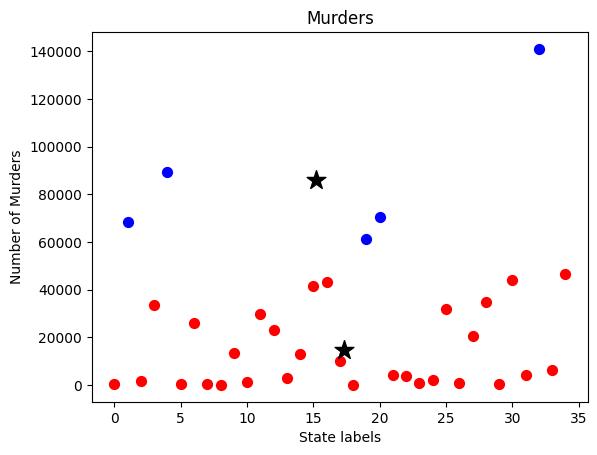

In [87]:
X = df1
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)
labels = kmeans.labels_

clusters = kmeans.cluster_centers_

y_km = kmeans.fit_predict(df1)

df11 = df1
df11 = np.array(df11)
plt.scatter(df11[y_km == 0,0],df11[y_km == 0,1], s = 50, color = 'red')
plt.scatter(df11[y_km == 1,0],df11[y_km == 1,1], s = 50, color = 'blue')
plt.scatter(clusters[0][0], clusters[0][1],marker = '*',s=200, color ='black')
plt.scatter(clusters[1][0], clusters[1][1],marker = '*',s=200, color ='black')
plt.title("Murders")
plt.xlabel("State labels")
plt.ylabel("Number of Murders")

Blue points:High murder rate states
Red points:Low murder rate states

In [74]:
clusters

array([[1.73000000e+01, 1.47025333e+04],
       [1.52000000e+01, 8.60824000e+04]])

Text(0, 0.5, 'Number of Rapes')

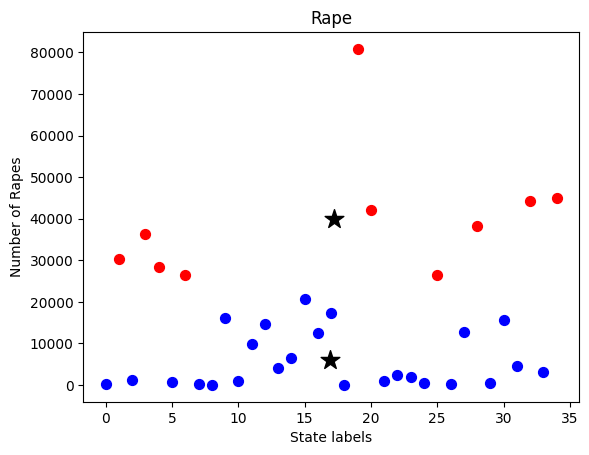

In [88]:
X = df2
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)
labels = kmeans.labels_

clusters = kmeans.cluster_centers_

y_km = kmeans.fit_predict(df2)

df11 = df2
df11 = np.array(df11)
plt.scatter(df11[y_km == 0,0],df11[y_km == 0,1], s = 50, color = 'red')
plt.scatter(df11[y_km == 1,0],df11[y_km == 1,1], s = 50, color = 'blue')
plt.scatter(clusters[0][0], clusters[0][1],marker = '*',s=200, color ='black')
plt.scatter(clusters[1][0], clusters[1][1],marker = '*',s=200, color ='black')
plt.title("Rape")
plt.xlabel("State labels")
plt.ylabel("Number of Rapes")

Red points:High rape rate states
Blue points:Low rape rate states

In [76]:
clusters

array([[1.72000e+01, 3.98190e+04],
       [1.69200e+01, 5.89992e+03]])

Text(0, 0.5, 'Number of Kidnapping and Abduction')

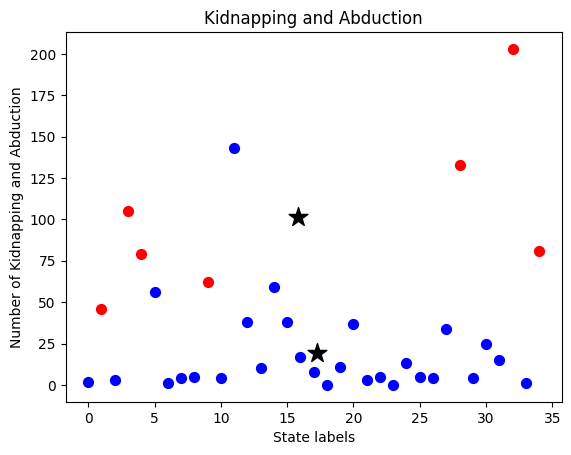

In [89]:
X = df3
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)
labels = kmeans.labels_

clusters = kmeans.cluster_centers_

y_km = kmeans.fit_predict(df3)

df11 = df3
df11 = np.array(df11)
plt.scatter(df11[y_km == 0,0],df11[y_km == 0,1], s = 50, color = 'red')
plt.scatter(df11[y_km == 1,0],df11[y_km == 1,1], s = 50, color = 'blue')
plt.scatter(clusters[0][0], clusters[0][1],marker = '*',s=200, color ='black')
plt.scatter(clusters[1][0], clusters[1][1],marker = '*',s=200, color ='black')
plt.title("Kidnapping and Abduction")
plt.xlabel("State labels")
plt.ylabel("Number of Kidnapping and Abduction")

Blue points:Low kidnapping rate states
Red points:High kidnapping rate states

In [78]:
clusters

array([[1.58571429e+01, 1.01285714e+02, 7.62854286e+04],
       [1.72857143e+01, 1.94642857e+01, 1.10942143e+04]])

Text(0, 0.5, 'Number of Dacoity')

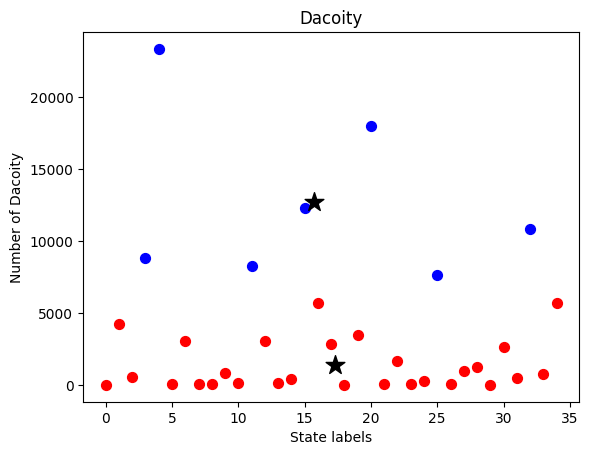

In [90]:
X = df4
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)
labels = kmeans.labels_

clusters = kmeans.cluster_centers_

y_km = kmeans.fit_predict(df4)

df11 = df4
df11 = np.array(df11)
plt.scatter(df11[y_km == 0,0],df11[y_km == 0,1], s = 50, color = 'red')
plt.scatter(df11[y_km == 1,0],df11[y_km == 1,1], s = 50, color = 'blue')
plt.scatter(clusters[0][0], clusters[0][1],marker = '*',s=200, color ='black')
plt.scatter(clusters[1][0], clusters[1][1],marker = '*',s=200, color ='black')
plt.title("Dacoity")
plt.xlabel("State labels")
plt.ylabel("Number of Dacoity")

Blue points:High dacoity rate states
Red points:Low dacoity rate states

In [80]:
clusters

array([[   17.32142857,  1382.57142857],
       [   15.71428571, 12740.57142857]])

Text(0, 0.5, 'Number of Robbery')

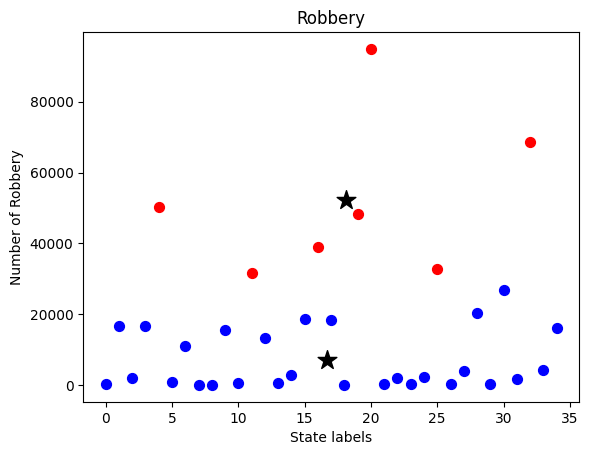

In [91]:
X = df5
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)
labels = kmeans.labels_

clusters = kmeans.cluster_centers_

y_km = kmeans.fit_predict(df5)

df11 = df5
df11 = np.array(df11)
plt.scatter(df11[y_km == 0,0],df11[y_km == 0,1], s = 50, color = 'red')
plt.scatter(df11[y_km == 1,0],df11[y_km == 1,1], s = 50, color = 'blue')
plt.scatter(clusters[0][0], clusters[0][1],marker = '*',s=200, color ='black')
plt.scatter(clusters[1][0], clusters[1][1],marker = '*',s=200, color ='black')
plt.title("Robbery")
plt.xlabel("State labels")
plt.ylabel("Number of Robbery")

Blue points:Low robbery rate states
Red points:High robbery rate states

In [82]:
clusters

array([[1.81428571e+01, 5.22251429e+04],
       [1.67142857e+01, 6.95757143e+03]])

Text(0, 0.5, 'Number of Riots')

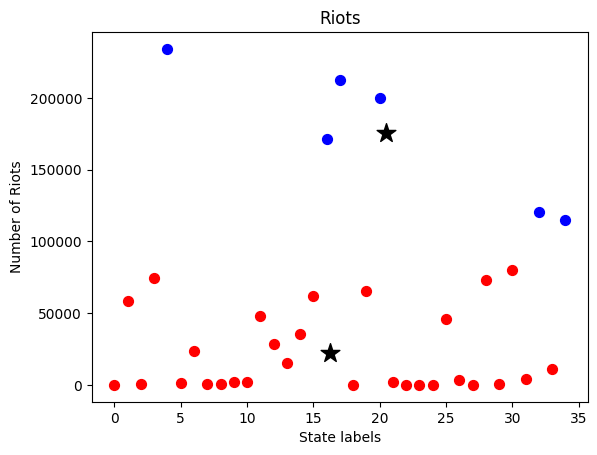

In [92]:
X = df6
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)
labels = kmeans.labels_

clusters = kmeans.cluster_centers_

y_km = kmeans.fit_predict(df6)

df11 = df6
df11 = np.array(df11)
plt.scatter(df11[y_km == 0,0],df11[y_km == 0,1], s = 50, color = 'red')
plt.scatter(df11[y_km == 1,0],df11[y_km == 1,1], s = 50, color = 'blue')
plt.scatter(clusters[0][0], clusters[0][1],marker = '*',s=200, color ='black')
plt.scatter(clusters[1][0], clusters[1][1],marker = '*',s=200, color ='black')
plt.title("Riots")
plt.xlabel("State labels")
plt.ylabel("Number of Riots")

Blue points:High riot rate states
Red points:Low riot rate states

In [84]:
clusters

array([[1.62758621e+01, 2.21174483e+04],
       [2.05000000e+01, 1.75450000e+05]])

Text(0, 0.5, 'Number of Dowry Deaths')

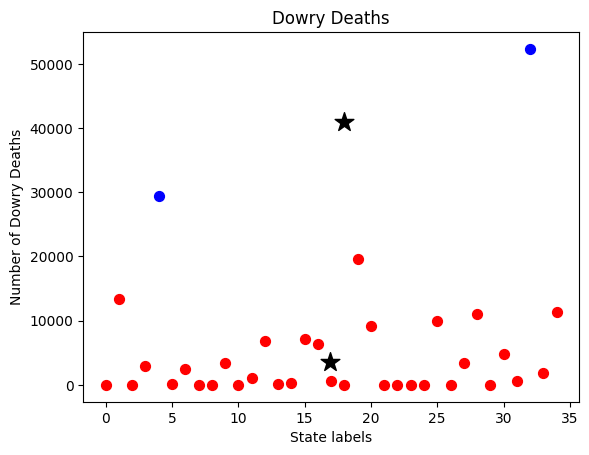

In [93]:
X = df7
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=2,random_state=0)

kmeans.fit(X)
labels = kmeans.labels_

clusters = kmeans.cluster_centers_

y_km = kmeans.fit_predict(df7)

df11 = df7
df11 = np.array(df11)
plt.scatter(df11[y_km == 0,0],df11[y_km == 0,1], s = 50, color = 'red')
plt.scatter(df11[y_km == 1,0],df11[y_km == 1,1], s = 50, color = 'blue')
plt.scatter(clusters[0][0], clusters[0][1],marker = '*',s=200, color ='black')
plt.scatter(clusters[1][0], clusters[1][1],marker = '*',s=200, color ='black')
plt.title("Dowry Deaths")
plt.xlabel("State labels")
plt.ylabel("Number of Dowry Deaths")

Blue points:High dowry death rate states
Red points:Low dowry death rate states

In [86]:
clusters

array([[1.69393939e+01, 3.53915152e+03],
       [1.80000000e+01, 4.08890000e+04]])